In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from mpl_toolkits import mplot3d
import gudhi as gd
import pandas  as pd
import timeit

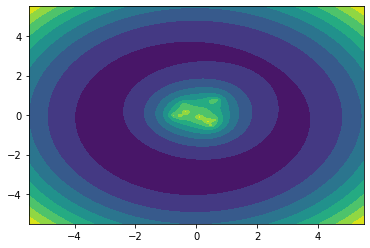

In [5]:
#Random Model

#location of source
yy=complex(0,0)


#number of points
g=10
#mass of points
m=1*np.ones(g)
#location of points
r=np.random.rand(g)
u=np.power(r,.5)
theta = np.random.uniform(0,2*math.pi,g)
math.pi

xi=np.zeros(g,dtype=np.complex)
for i in range(g):
    xi[i]=cmath.rect(u[i],theta[i])
    

x=np.linspace(-5.5,5.5,400)
y=np.linspace(-5.5,5.5,400)

#two lists in R, that is a grid in R^2, to one list in C
zz=np.zeros(len(x)*len(y),dtype=np.complex_)
for i in range(len(y)):
    for j in range(len(x)):
        zz[j+i*len(x)] = complex(x[j],y[i])

        
z=np.zeros((len(y),len(x)))          
for i in range(len(y)):
    for j in range(len(x)):
        #Quadratic part
        z[i,j]=abs(zz[j+i*len(x)]-yy)**2/2
        for k in range(g):
            #Gravitational potential part
            z[i,j]=z[i,j]-m[k]*np.log(abs(zz[j+i*len(x)]-xi[k]))


h=plt.contourf(x,y,z,10)
plt.show()

In [ ]:
#Random Model const mass uniform random locations in circle size sqrt g

#location of source
yy=complex(0,0)


#number of points
g=4
#mass of points
m=1
#location of points
r=g*np.random.rand(g)

u=np.power(r,.5)
theta = np.random.uniform(0,2*math.pi,g)
math.pi

xi=np.zeros(g,dtype=np.complex)
for i in range(g):
    xi[i]=cmath.rect(u[i],theta[i])

x=np.linspace(-2*np.sqrt(g),2*np.sqrt(g),1000)
y=np.linspace(-2*np.sqrt(g),2*np.sqrt(g),1000)


#two lists in R, that is a grid in R^2, to one list in C
zz=np.zeros(len(x)*len(y),dtype=np.complex_)
for i in range(len(y)):
    for j in range(len(x)):
        zz[j+i*len(x)] = complex(x[j],y[i])

        
z=np.zeros((len(y),len(x)))          
for i in range(len(y)):
    for j in range(len(x)):
        #Quadratic part
        Q=abs(zz[j+i*len(x)]-yy)**2/2
        K=0
        for k in range(g):
            #Gravitational potential part
            K=K+np.log(abs(zz[j+i*len(x)]-xi[k]))
            G=m*K
        z[i,j]=Q-G

h=plt.contourf(x,y,z,10)
plt.show()

In [ ]:
#Weyl polynomial version of random lensing. Uniform masses

#location of source
yy=complex(0,0)

#number of points
g=10

#mass of points
m=1

#Weyl polynomial coefficients
mu, sigma = 0,1 
n=np.random.randn(g+1, 2).view(np.complex128) 
c=np.ones(g+1)
for i in range(g+1):
    c[i]=1/np.sqrt(np.math.factorial(i))
c=c.reshape(g+1,1)
N=np.multiply(c,n)   
    
    
#x=np.linspace(-max(1.5,m)*np.sqrt(g),max(1.5,m)*np.sqrt(g),1000)
#y=np.linspace(-max(1.5,m)*np.sqrt(g),max(1.5,m)*np.sqrt(g),1000)

x=np.linspace(-4.5,4.5,400)
y=np.linspace(-4.5,4.5,400)


#two lists in R, that is a grid in R^2, to one list in C
zz=np.zeros(len(x)*len(y),dtype=np.complex_)
for i in range(len(y)):
    for j in range(len(x)):
        zz[j+i*len(x)] = complex(x[j],y[i])        
        
        
z=np.zeros((len(y),len(x)))          
for i in range(len(y)):
    for j in range(len(x)):
        #Quadratic part
        Q=abs(zz[j+i*len(x)]-yy)**2/2
        #Gravitational potential part
        K=0
        for k in range(g+1):
            K=K+N[k]*zz[j+i*len(x)]**k             
        G=m*np.log(abs(K))
        z[i,j]=Q-G
        

h=plt.contourf(x,y,z,10)
plt.show()


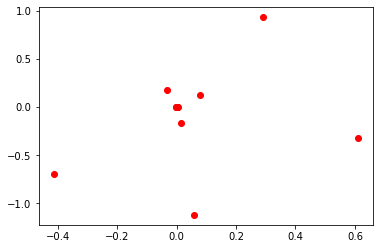

array([[ 6.10957306e-01-3.27356552e-01j],
       [-4.13726454e-01-6.92801092e-01j],
       [ 2.91513501e-01+9.31918453e-01j],
       [ 5.95300646e-02-1.12133973e+00j],
       [-3.15498080e-02+1.72725064e-01j],
       [ 1.35368512e-02-1.64922680e-01j],
       [ 7.93850724e-02+1.21433989e-01j],
       [-2.72956824e-03-3.25758459e-03j],
       [ 5.25283999e-03+1.09488496e-03j],
       [-7.32442212e-04-1.67904079e-03j],
       [-3.71724062e-04+8.14785501e-05j],
       [ 1.44459875e-04-2.64303289e-04j],
       [ 8.32755235e-06+8.52270113e-07j],
       [ 1.20688849e-05-2.08433128e-06j],
       [ 3.91486921e-06-1.03559804e-06j],
       [-1.41872672e-06-1.35865199e-06j],
       [ 2.85164411e-07+2.29136219e-07j],
       [ 7.12660748e-08-6.48511530e-08j],
       [ 2.92474451e-09-1.33202769e-08j],
       [-1.34159911e-09-2.39480066e-10j],
       [ 5.55838539e-10-3.20732387e-10j]])

In [10]:
#Weyl polynomial coefficients
g=21
mu, sigma = 0,1 
n=np.random.randn(g, 2).view(np.complex128) 
c=np.ones(g)
for i in range(g):
    c[i]=1/np.sqrt(np.math.factorial(i))
c=c.reshape(g,1)
N=np.multiply(c,n) 

X = [x.real for x in N]
Y = [x.imag for x in N]
plt.scatter(X,Y, color='red')
plt.show()

N

In [ ]:
#location of source
yy=complex(0,0)

#number of mass points
g=2
#mass of mass points
m=[.5,.5]
#location of mass points
a=complex(.5,.5)
b=complex(-1.5,-.25)
xi=[a,b]

x=np.linspace(-2,2,20)
y=np.linspace(-2,2,20)

#two lists in R, that is a grid in R^2, to one list in C
zz=np.zeros(len(x)*len(y),dtype=np.complex_)
for i in range(len(y)):
    for j in range(len(x)):
        zz[j+i*len(x)] = complex(x[j],y[i])

        
z=np.zeros((len(y),len(x)))          
for i in range(len(y)):
    for j in range(len(x)):
        #Quadratic part
        z[i,j]=abs(zz[j+i*len(x)]-yy)**2/2
        for k in range(g):
            #Gravitational potential part
            z[i,j]=z[i,j]-m[k]*np.log(abs(zz[j+i*len(x)]-xi[k]))


h=plt.contourf(x,y,z,30)
plt.show()

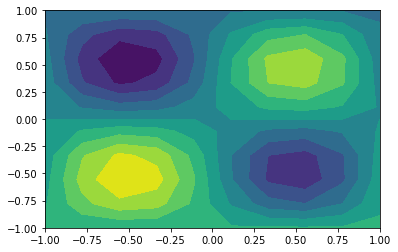

In [16]:
#work on binning and creating a cubical complex for a nonsingular function
#z=f(x,y)=sin(pi*x)*sin(pi*y) has local max at (.5,.5),(-.5,-.5), min at (-.5, .5),(.5,-.5), and a saddle \ at the origin
from mpl_toolkits import mplot3d

pi=np.pi
def f(x, y):
    return np.sin(pi*x) * np.sin(pi* y)-.25*y


x=np.linspace(-1, 1,10)
y=np.linspace(-1, 1,10)

x,y = np.meshgrid(x,y)
z=f(x, y)

bins = np.linspace(z.min(),z.max(),100)
inds = np.digitize(z,bins)

fig = plt.figure()


h=plt.contourf(x,y,inds,10)
plt.show()


file = open("testpers.txt","w") 
file.write(str(len(z.shape))+"\n")
file.write(str(z.shape[0])+"\n") 
file.write(str(z.shape[1])+"\n")

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if  inds[i][j]==100:
            file.write("inf"+"\n")
        else:
            file.write(str(inds[i][j])+"\n")


file.close()

usetex mode requires TeX.


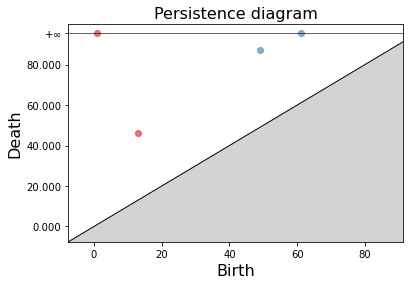

In [17]:

cc = gd.CubicalComplex(perseus_file="testpers.txt")

cc.persistence()
pers_cc = cc.persistence()
gd.plot_persistence_diagram(pers_cc);

In [ ]:
#number of mass points
g=4
#mass of mass points
m=(g-2/g)*np.ones(g)
#location of mass points
a=complex(.5,.5)
b=complex(-1.5,-.25)
c=complex(0,-1)
d=complex(-.5,1)
xi=[a,b,c,d]


gridsize=500
x=np.linspace(-5,5,gridsize)
y=np.linspace(-5,5,gridsize)

#two lists in R, that is a grid in R^2, to one list in C
zz=np.zeros(len(x)*len(y),dtype=np.complex_)
for i in range(len(y)):
    for j in range(len(x)):
        zz[j+i*len(x)] = complex(x[j],y[i])

        
z=np.zeros((len(y),len(x)))          
for i in range(len(y)):
    for j in range(len(x)):
        #Quadratic part
        z[i,j]=abs(zz[j+i*len(x)])**2/2
        for k in range(g):
            #Gravitational potential part
            z[i,j]=z[i,j]-m[k]*np.log(abs(zz[j+i*len(x)]-xi[k]))


h=plt.contourf(x,y,z,50)
plt.show()

In [ ]:
#Circle type
#location of source
yy=complex(0.0,0.0)

#number of mass points (on circle)
g=3
#mass of mass points

#Rhie paper?
#m=(1/g)*np.ones(g)

#producing more critical points
m=(2.2/g)*np.ones(g)

#location of mass points
xi=np.zeros(g, dtype=complex)
theta = math.pi * 2 / g 
for i in range(g): 
    xi[i]=complex(math.cos(i*theta),math.sin(i*theta))

#calculate and plot time delay    
x=np.linspace(-2, 2,1000)
y=np.linspace(-2, 2,1000)

#two lists in R, that is a grid in R^2, to one list in C
zz=np.zeros(len(x)*len(y),dtype=np.complex_)
for i in range(len(y)):
    for j in range(len(x)):
        zz[j+i*len(x)] = complex(x[j],y[i])

        
z=np.zeros((len(y),len(x)))          
for i in range(len(y)):
    for j in range(len(x)):
        #Quadratic part
        z[i,j]=abs(zz[j+i*len(x)]-yy)**2/2
        for k in range(g):
            #Gravitational potential part
            z[i,j]=z[i,j]-m[k]*np.log(abs(zz[j+i*len(x)]-xi[k]))


h=plt.contourf(x,y,z,50)
plt.show()

In [ ]:
#Rhie type
#location of source
yy=complex(0.0,0.0)

#number of mass points (on circle)
g=5
#mass of mass points (on circle)
m=(2/g)*np.ones(g+1)
#the tiny center mass
m[g]=25/100.*m[g]


#location of mass points
xi=np.zeros(g+1, dtype=complex)
theta = math.pi * 2 / g 
for i in range(g): 
    xi[i]=complex(math.cos(i*theta),math.sin(i*theta))
xi[g]=complex(0,0)

#calculate and plot time delay    
x=np.linspace(-2,2,1000)
y=np.linspace(-2,2,1000)

#two lists in R, that is a grid in R^2, to one list in C
zz=np.zeros(len(x)*len(y),dtype=np.complex_)
for i in range(len(y)):
    for j in range(len(x)):
        zz[j+i*len(x)] = complex(x[j],y[i])

        
z=np.zeros((len(y),len(x)))          
for i in range(len(y)):
    for j in range(len(x)):
        #Quadratic part
        z[i,j]=abs(zz[j+i*len(x)]-yy)**2/2
        for k in range(g+1):
            #Gravitational potential part
            z[i,j]=z[i,j]-m[k]*np.log(abs(zz[j+i*len(x)]-xi[k]))


h=plt.contourf(x,y,z,50)
plt.show()

In [ ]:


bincount=1000
bins = np.linspace(z.min(),.5*z.max(),bincount)
inds = np.digitize(z,bins)

h=plt.contourf(x,y,inds,500)
plt.show()

file = open("starpers.txt","w") 
file.write(str(len(z.shape))+"\n")
file.write(str(z.shape[0])+"\n") 
file.write(str(z.shape[1])+"\n")

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if  inds[i][j]==bincount:
            file.write("inf"+"\n")
        else:
            file.write(str(inds[i][j])+"\n")

file.close()

cc = gd.CubicalComplex(perseus_file="starpers.txt")
pers_cc = cc.persistence()
#gd.plot_persistence_diagram(pers_cc);


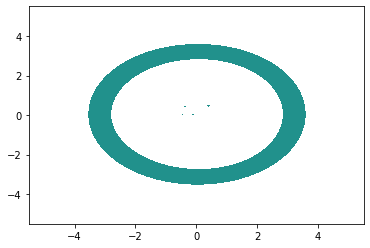

In [13]:
gradgrid = np.linspace(0,.0,2)

zgrad = np.gradient(z)
abzgrad = np.sqrt(zgrad[0]**2 + zgrad[1]**2)

h = plt.contourf(x,y,abzgrad,gradgrid)
plt.show()

In [ ]:
#Iteration of the following model.
df=pd.DataFrame()
for m in range(10):
    for l in range(10):
        #Weyl polynomial version of random lensing. Uniform masses
        #location of source
        yy=complex(0,0)
        #number of points
        g=20
        #mass of points
        mass=.5+m    
        #Weyl polynomial coefficients
        mu, sigma = 0,1 
        n=np.random.randn(g+1, 2).view(np.complex128) 
        c=np.ones(g+1)
        for i in range(g+1):
            c[i]=1/np.sqrt(np.math.factorial(i))
        c=c.reshape(g+1,1)
        N=np.multiply(c,n)   
        
        x=np.linspace(-1.5*np.sqrt(g),1.5*np.sqrt(g),1000)
        y=np.linspace(-1.5*np.sqrt(g),1.5*np.sqrt(g),1000)

        #two lists in R, that is a grid in R^2, to one list in C
        zz=np.zeros(len(x)*len(y),dtype=np.complex_)
        for i in range(len(y)):
            for j in range(len(x)):
                zz[j+i*len(x)] = complex(x[j],y[i])        
                
        z=np.zeros((len(y),len(x)))          
        for i in range(len(y)):
            for j in range(len(x)):
                #Quadratic part
                Q=abs(zz[j+i*len(x)]-yy)**2/2
                #Gravitational potential part
                K=0
                for k in range(g+1):
                    K=K+N[k]*zz[j+i*len(x)]**k             
                G=mass*np.log(abs(K))
                z[i,j]=Q-G

        bincount=1000
        bins = np.linspace(z.min(),.5*z.max(),bincount)
        inds = np.digitize(z,bins)

        file = open("starpers.txt","w") 
        file.write(str(len(z.shape))+"\n")
        file.write(str(z.shape[0])+"\n") 
        file.write(str(z.shape[1])+"\n")

        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if  inds[i][j]==bincount:
                    file.write("inf"+"\n")
                else:
                    file.write(str(inds[i][j])+"\n")

        file.close()

        cc = gd.CubicalComplex(perseus_file="starpers.txt")
        pers_cc = cc.persistence()   
        saddles = len(cc.persistence_intervals_in_dimension(1)) + len(cc.persistence_intervals_in_dimension(0)-1)
        minima = len(cc.persistence_intervals_in_dimension(0))
        df1=pd.DataFrame()
        df1['m']=[mass]
        df1['i']=[l]
        df1['Saddles']=[saddles]
        df1['Minima']=[minima]
        df1['Total Images']=[minima+saddles]
        df=df.append(df1)
        
df        

In [ ]:
#Iteration of the following model.
df=pd.DataFrame()
for m in range(10):
    for l in range(10):
        #Weyl polynomial version of random lensing. Uniform masses
        #location of source
        yy=complex(0,0)
        #number of points
        g=20
        #mass of points
        mass=.5+m*.1    
        #Weyl polynomial coefficients
        mu, sigma = 0,1 
        n=np.random.randn(g+1, 2).view(np.complex128) 
        c=np.ones(g+1)
        for i in range(g+1):
            c[i]=1/np.sqrt(np.math.factorial(i))
        c=c.reshape(g+1,1)
        N=np.multiply(c,n)   
        
        x=np.linspace(-1.5*np.sqrt(g),1.5*np.sqrt(g),1000)
        y=np.linspace(-1.5*np.sqrt(g),1.5*np.sqrt(g),1000)

        #two lists in R, that is a grid in R^2, to one list in C
        zz=np.zeros(len(x)*len(y),dtype=np.complex_)
        for i in range(len(y)):
            for j in range(len(x)):
                zz[j+i*len(x)] = complex(x[j],y[i])        
                
        z=np.zeros((len(y),len(x)))          
        for i in range(len(y)):
            for j in range(len(x)):
                #Quadratic part
                Q=abs(zz[j+i*len(x)]-yy)**2/2
                #Gravitational potential part
                K=0
                for k in range(g+1):
                    K=K+N[k]*zz[j+i*len(x)]**k             
                G=mass*np.log(abs(K))
                z[i,j]=Q-G

        bincount=1000
        bins = np.linspace(z.min(),.5*z.max(),bincount)
        inds = np.digitize(z,bins)

        file = open("starpers.txt","w") 
        file.write(str(len(z.shape))+"\n")
        file.write(str(z.shape[0])+"\n") 
        file.write(str(z.shape[1])+"\n")

        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if  inds[i][j]==bincount:
                    file.write("inf"+"\n")
                else:
                    file.write(str(inds[i][j])+"\n")

        file.close()

        cc = gd.CubicalComplex(perseus_file="starpers.txt")
        pers_cc = cc.persistence()   
        saddles = len(cc.persistence_intervals_in_dimension(1)) + len(cc.persistence_intervals_in_dimension(0)-1)
        minima = len(cc.persistence_intervals_in_dimension(0))
        df1=pd.DataFrame()
        df1['m']=[mass]
        df1['i']=[l]
        df1['Saddles']=[saddles]
        df1['Minima']=[minima]
        df1['Total Images']=[minima+saddles]
        df=df.append(df1)
        
df        

In [ ]:
#DF of critical point cardinality. Varying mass uniformly between .1 and 15.0
#Pt mass model equal masses, positions based on Weyl Polynomials. 

start_time = timeit.default_timer()
mrange=150
lrange=16
df_byMass=pd.DataFrame()
for m in range(mrange):
    for l in range(lrange):
        #Weyl polynomial version of random lensing. Uniform masses
        #location of source
        yy=complex(0,0)
        #number of points
        g=20
        #mass of points
        mass=.1+m*.1
        #Weyl polynomial coefficients
        mu, sigma = 0,1 
        n=np.random.randn(g+1, 2).view(np.complex128) 
        c=np.ones(g+1)
        for i in range(g+1):
            c[i]=1/np.sqrt(np.math.factorial(i))
        c=c.reshape(g+1,1)
        N=np.multiply(c,n)   
        
        x=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)
        y=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)

        #two lists in R, that is a grid in R^2, to one list in C
        zz=np.zeros(len(x)*len(y),dtype=np.complex_)
        for i in range(len(y)):
            for j in range(len(x)):
                zz[j+i*len(x)] = complex(x[j],y[i])        
                
        z=np.zeros((len(y),len(x)))          
        for i in range(len(y)):
            for j in range(len(x)):
                #Quadratic part
                Q=abs(zz[j+i*len(x)]-yy)**2/2
                #Gravitational potential part
                K=0
                for k in range(g+1):
                    K=K+N[k]*zz[j+i*len(x)]**k             
                G=mass*np.log(abs(K))
                z[i,j]=Q-G

        bincount=1000
        bins = np.linspace(z.min(),.5*z.max(),bincount)
        inds = np.digitize(z,bins)

        file = open("starpers.txt","w") 
        file.write(str(len(z.shape))+"\n")
        file.write(str(z.shape[0])+"\n") 
        file.write(str(z.shape[1])+"\n")

        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if  inds[i][j]==bincount:
                    file.write("inf"+"\n")
                else:
                    file.write(str(inds[i][j])+"\n")

        file.close()

        cc = gd.CubicalComplex(perseus_file="starpers.txt")
        pers_cc = cc.persistence()   
        saddles = len(cc.persistence_intervals_in_dimension(1)) + len(cc.persistence_intervals_in_dimension(0)-1)
        minima = len(cc.persistence_intervals_in_dimension(0))
        df=pd.DataFrame()
        df['m']=[mass]
        df['i']=[l]
        df['Saddles']=[saddles]
        df['Minima']=[minima]
        df['Total Images']=[minima+saddles]
        df_byMass=df_byMass.append(df)
        elapsed = timeit.default_timer() - start_time
        print(df)
        print(elapsed)
        print(m)
        print(l)
df_byMass        

In [ ]:
mrange=150
dfMeans_byMass=pd.DataFrame()
for m in range(mrange):
    df=pd.DataFrame()
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    df3=pd.DataFrame()
    mass=.1+.1*m
    df1=df_byMass[df_byMass['m']==mass]['Total Images']
    df2=df_byMass[df_byMass['m']==mass]['Saddles']
    df3=df_byMass[df_byMass['m']==mass]['Minima']
    ImgMean=np.mean(df1.values)
    SadMean=np.mean(df2.values)
    MinMean=np.mean(df3.values)
    df['m']=[mass]
    df['Avg Critical Points']=[ImgMean]
    df['Avg Index 1 Critical Points']=[SadMean]
    df['Avg Index 0 Critical Points']=[MinMean]
    dfMeans_byMass=dfMeans_byMass.append(df)
dfMeans_byMass

In [ ]:
#DF of critical point cardinality. Varying mass uniformly between .1 and 2.0
#Pt mass model equal masses, positions based on Weyl Polynomials. 

start_time = timeit.default_timer()
mrange=200
lrange=30
df_bymass=pd.DataFrame()
dfMeans_bymass=pd.DataFrame()
for m in range(mrange):
    #mass of points
    mass=.1+m*.01
    for l in range(lrange):
        #Weyl polynomial version of random lensing. Uniform masses
        #location of source
        yy=complex(0,0)
        #number of points
        g=20
        #mass of points
        mass=.1+m*.01
        #Weyl polynomial coefficients
        mu, sigma = 0,1 
        n=np.random.randn(g+1, 2).view(np.complex128) 
        c=np.ones(g+1)
        for i in range(g+1):
            c[i]=1/np.sqrt(np.math.factorial(i))
        c=c.reshape(g+1,1)
        N=np.multiply(c,n)   
        
        x=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)
        y=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)

        #two lists in R, that is a grid in R^2, to one list in C
        zz=np.zeros(len(x)*len(y),dtype=np.complex_)
        for i in range(len(y)):
            for j in range(len(x)):
                zz[j+i*len(x)] = complex(x[j],y[i])        
                
        z=np.zeros((len(y),len(x)))          
        for i in range(len(y)):
            for j in range(len(x)):
                #Quadratic part
                Q=abs(zz[j+i*len(x)]-yy)**2/2
                #Gravitational potential part
                K=0
                for k in range(g+1):
                    K=K+N[k]*zz[j+i*len(x)]**k             
                G=mass*np.log(abs(K))
                z[i,j]=Q-G

        bincount=1000
        bins = np.linspace(z.min(),.5*z.max(),bincount)
        inds = np.digitize(z,bins)

        file = open("starpers.txt","w") 
        file.write(str(len(z.shape))+"\n")
        file.write(str(z.shape[0])+"\n") 
        file.write(str(z.shape[1])+"\n")

        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if  inds[i][j]==bincount:
                    file.write("inf"+"\n")
                else:
                    file.write(str(inds[i][j])+"\n")

        file.close()

        cc = gd.CubicalComplex(perseus_file="starpers.txt")
        pers_cc = cc.persistence()   
        saddles = len(cc.persistence_intervals_in_dimension(1)) + len(cc.persistence_intervals_in_dimension(0)-1)
        minima = len(cc.persistence_intervals_in_dimension(0))
        df=pd.DataFrame()
        df['m']=[mass]
        df['i']=[l]
        df['Saddles']=[saddles]
        df['Minima']=[minima]
        df['Total Images']=[minima+saddles]
        df_bymass=df_bymass.append(df)
        elapsed = timeit.default_timer() - start_time
        print(df)
        print(elapsed)
        print(m)
        print(l)
    df=pd.DataFrame()    
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    df3=pd.DataFrame()
    df1=df_bymass[df_bymass['m']==mass]['Total Images']
    df2=df_bymass[df_bymass['m']==mass]['Saddles']
    df3=df_bymass[df_bymass['m']==mass]['Minima']
    ImgMean=np.mean(df1.values)
    SadMean=np.mean(df2.values)
    MinMean=np.mean(df3.values)
    df['m']=[mass]
    df['Avg Critical Points']=[ImgMean]
    df['Avg Index 1 Critical Points']=[SadMean]
    df['Avg Index 0 Critical Points']=[MinMean]
    dfMeans_bymass=dfMeans_bymass.append(df)

dfMeans_bymass.plot(x='m')

In [ ]:
#DF of critical point cardinality. Fixed mass at 1. Vary number of masses from one to twenty.
#Pt mass model equal masses, positions based on Weyl Polynomials. 

start_time = timeit.default_timer()
df_mass1g1to20=pd.DataFrame()
dfMeans_mass1g1to20=pd.DataFrame()
lrange=30
for g in range(1,21):
    for l in range(lrange):
        #Weyl polynomial version of random lensing. Uniform masses
        #location of source
        yy=complex(0,0)
        #mass of points
        mass=1
        #Weyl polynomial coefficients
        n=np.random.randn(g+1, 2).view(np.complex128) 
        c=np.ones(g+1)
        for i in range(g+1):
            c[i]=1/np.sqrt(np.math.factorial(i))
        c=c.reshape(g+1,1)
        N=np.multiply(c,n)   
        
        x=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)
        y=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)

        #two lists in R, that is a grid in R^2, to one list in C
        zz=np.zeros(len(x)*len(y),dtype=np.complex_)
        for i in range(len(y)):
            for j in range(len(x)):
                zz[j+i*len(x)] = complex(x[j],y[i])        
                
        z=np.zeros((len(y),len(x)))          
        for i in range(len(y)):
            for j in range(len(x)):
                #Quadratic part
                Q=abs(zz[j+i*len(x)]-yy)**2/2
                #Gravitational potential part
                K=0
                for k in range(g+1):
                    K=K+N[k]*zz[j+i*len(x)]**k             
                G=mass*np.log(abs(K))
                z[i,j]=Q-G

        bincount=1000
        bins = np.linspace(z.min(),.5*z.max(),bincount)
        inds = np.digitize(z,bins)

        file = open("starpers.txt","w") 
        file.write(str(len(z.shape))+"\n")
        file.write(str(z.shape[0])+"\n") 
        file.write(str(z.shape[1])+"\n")

        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if  inds[i][j]==bincount:
                    file.write("inf"+"\n")
                else:
                    file.write(str(inds[i][j])+"\n")

        file.close()

        cc = gd.CubicalComplex(perseus_file="starpers.txt")
        pers_cc = cc.persistence()   
        saddles = len(cc.persistence_intervals_in_dimension(1)) + len(cc.persistence_intervals_in_dimension(0)-1)
        minima = len(cc.persistence_intervals_in_dimension(0))
        df=pd.DataFrame()
        df['m']=[mass]
        df['g']=[g]
        df['i']=[l]
        df['Saddles']=[saddles]
        df['Minima']=[minima]
        df['Total Images']=[minima+saddles]
        df_mass1g1to20=df_mass1g1to20.append(df)
        elapsed = timeit.default_timer() - start_time
        print(df)
        print(elapsed)
        print(m)
        print(l)
    df=pd.DataFrame()    
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    df3=pd.DataFrame()
    df1=df_mass1g1to20[df_mass1g1to20['g']==g]['Total Images']
    df2=df_mass1g1to20[df_mass1g1to20['g']==g]['Saddles']
    df3=df_mass1g1to20[df_mass1g1to20['g']==g]['Minima']
    ImgMean=np.mean(df1.values)
    SadMean=np.mean(df2.values)
    MinMean=np.mean(df3.values)
    df['m']=[mass]
    df['g']=[g]
    df['Avg Critical Points']=[ImgMean]
    df['Avg Index 1 Critical Points']=[SadMean]
    df['Avg Index 0 Critical Points']=[MinMean]
    dfMeans_mass1g1to20=dfMeans_mass1g1to20.append(df)


In [ ]:
#DF of critical point cardinality. Fixed mass at 1. Vary number of masses from one to twenty.
#Pt mass model equal masses, positions based on Weyl Polynomials. 

start_time = timeit.default_timer()
df_gm=pd.DataFrame()
df_means=pd.DataFrame()
lrange=25
mrange=21
grange=21
for g in range(1,grange):
    for m in range(mrange):
        for l in range(lrange):
            #Weyl polynomial version of random lensing. Uniform masses
            #location of source
            yy=complex(0,0)
            #mass of points
            mass=.5+.1*m
            #Weyl polynomial coefficients
            n=np.random.randn(g+1, 2).view(np.complex128) 
            c=np.ones(g+1)
            for i in range(g+1):
                c[i]=1/np.sqrt(np.math.factorial(i))
            c=c.reshape(g+1,1)
            N=np.multiply(c,n)   

            x=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)
            y=np.linspace(-1*max(1.5,mass)*np.sqrt(g),max(1.5,mass)*np.sqrt(g),1000)

            #two lists in R, that is a grid in R^2, to one list in C
            zz=np.zeros(len(x)*len(y),dtype=np.complex_)
            for i in range(len(y)):
                for j in range(len(x)):
                    zz[j+i*len(x)] = complex(x[j],y[i])        

            z=np.zeros((len(y),len(x)))          
            for i in range(len(y)):
                for j in range(len(x)):
                    #Quadratic part
                    Q=abs(zz[j+i*len(x)]-yy)**2/2
                    #Gravitational potential part
                    K=0
                    for k in range(g+1):
                        K=K+N[k]*zz[j+i*len(x)]**k             
                    G=mass*np.log(abs(K))
                    z[i,j]=Q-G

            bincount=1000
            bins = np.linspace(z.min(),.5*z.max(),bincount)
            inds = np.digitize(z,bins)

            file = open("starpers.txt","w") 
            file.write(str(len(z.shape))+"\n")
            file.write(str(z.shape[0])+"\n") 
            file.write(str(z.shape[1])+"\n")

            for i in range(z.shape[0]):
                for j in range(z.shape[1]):
                    if  inds[i][j]==bincount:
                        file.write("inf"+"\n")
                    else:
                        file.write(str(inds[i][j])+"\n")

            file.close()

            cc = gd.CubicalComplex(perseus_file="starpers.txt")
            pers_cc = cc.persistence()   
            saddles = len(cc.persistence_intervals_in_dimension(1)) + len(cc.persistence_intervals_in_dimension(0)-1)
            minima = len(cc.persistence_intervals_in_dimension(0))
            df=pd.DataFrame()
            df['m']=[mass]
            df['g']=[g]
            df['i']=[l]
            df['Saddles']=[saddles]
            df['Minima']=[minima]
            df['Total Images']=[minima+saddles]
            df_gm=df_gm.append(df)
            elapsed = timeit.default_timer() - start_time
            print(df)
            print(elapsed)
            print(m)
            print(l)
        df=pd.DataFrame()    
        df1=pd.DataFrame()
        df2=pd.DataFrame()
        df3=pd.DataFrame()
        df1=df_gm[(df_gm['m']==mass)&(df_gm['g']==g)]['Total Images']
        df2=df_gm[(df_gm['m']==mass)&(df_gm['g']==g)]['Saddles']
        df3=df_gm[(df_gm['m']==mass)&(df_gm['g']==g)]['Minima']
        ImgMean=np.mean(df1.values)
        SadMean=np.mean(df2.values)
        MinMean=np.mean(df3.values)
        df['m']=[mass]
        df['g']=[g]
        df['Avg Critical Points']=[ImgMean]
        df['Avg Index 1 Critical Points']=[SadMean]
        df['Avg Index 0 Critical Points']=[MinMean]
        df_means=df_means.append(df)
